In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df=pd.read_csv('dataset/lab2_1_data.csv', header=None)
 
df = df.T
df.head()
data = df.values
data.shape

(100, 2)

[[ 1.         -0.79945262]
 [-0.79945262  1.        ]]
[1.79945262 0.20054738]
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


(-1.0537385000000001, 1.0041085, -1.10616, 1.1963599999999999)

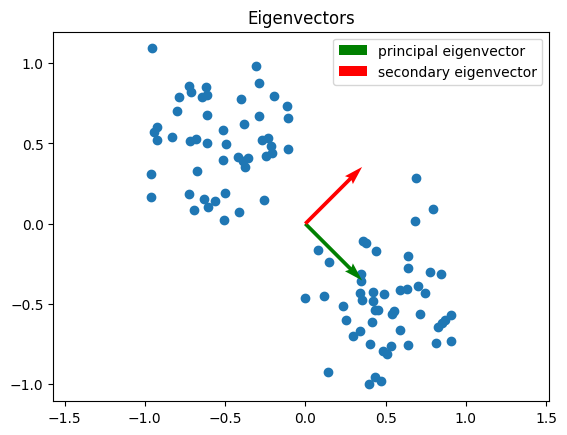

In [13]:
# correlation matrix
corr = np.corrcoef(data.T)
print(corr)
# eigen decomposition
eig_vals, eig_vecs = np.linalg.eig(corr)
print(eig_vals)
print(eig_vecs)


# plot the data
plt.scatter(data[:,0], data[:,1])
# plot the eigenvectors
principal_eigenvector = eig_vecs[:,0]
secondary_eigenvector = eig_vecs[:,1]

# plot the eigenvectors
plt.quiver(0, 0, principal_eigenvector[0], principal_eigenvector[1], scale= 2, scale_units='xy', angles='xy', color='g', label='principal eigenvector')
plt.quiver(0, 0, secondary_eigenvector[0], secondary_eigenvector[1], scale=2, scale_units='xy', angles='xy', color='r', label='secondary eigenvector')
plt.title('Eigenvectors')
plt.legend()
plt.axis('equal')


In [81]:
from typing import Any


class HebbianUpdate:
    """
    Empty class
    """
    def __init__(self) -> None:
        pass
    

class BasicHebbianUpdate(HebbianUpdate):
    def __init__(self) -> None:
        pass
    def __call__(self, w, u, v):
        return v * u


class OjaUpdate(HebbianUpdate):
    def __init__(self, alpha) -> None:
        self.alpha = alpha
    def __call__(self, w, u, v):
        return self.alpha * v * (u - self.alpha * v * w)


class SubtractiveNormUpdate(HebbianUpdate):
    def __init__(self) -> None:
        pass

    def __call__(self, w, u, v):
        n = np.ones_like(u)
        n_u = len(u)
        return v*(u - (np.dot(u,n))*n/n_u)


class BCMUpdate(HebbianUpdate):
    def __init__(self, theta, eta_th) -> None:
        super().__init__()
        self.theta = theta
        self.eta_th = eta_th

    def _update_theta(self, v):
        return v**2 - self.theta

    def __call__(self, w, u, v):
         w_upd=  v*u *(v -self.theta)
         self.theta += self.eta_th* self._update_theta(v)
         return w_upd
        
        

        

In [67]:
class Hebbian:
    
    def __init__(self, dim: int, update_func: HebbianUpdate) -> None:
        self.w = (np.random.rand(1, dim) - 0.5) * 2 # weight vector in range [-1, 1]
        self.update_func = update_func

    def predict(self, data):
        return np.dot(data, self.w.T) 

    def train(self, data, eta,  epochs: int = 100):
        # randomly shuffle the data
        ws = []
        for epoch in range(epochs):
            np.random.shuffle(data)
            for u in data:
                v = self.predict(u)
                self.w += eta * self.update_func(w=self.w, u=u, v=v)
                ws.append(self.w.copy())
        return np.array(ws).squeeze()
        


In [51]:
update_func = BasicHebbianUpdate()

hebbian_net = Hebbian(2, update_func=update_func)
ws = hebbian_net.train(data,  eta =0.01, epochs=100)

hebbian_net.w

array([[ 1.10762636e+25, -1.09757241e+25]])

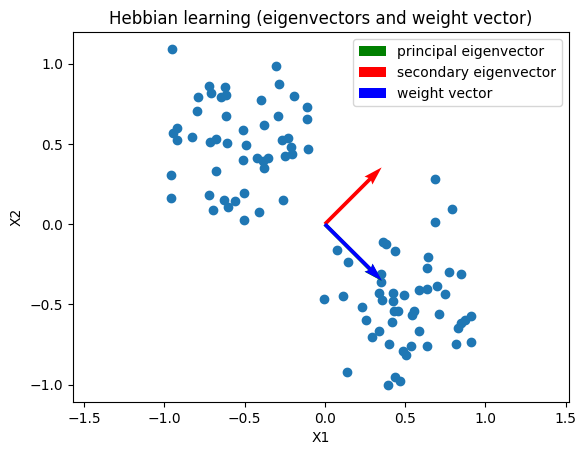

In [52]:
# plot the data
plt.scatter(data[:,0], data[:,1])
# plot the eigenvectors
principal_eigenvector = eig_vecs[:,0]
secondary_eigenvector = eig_vecs[:,1]

# plot the eigenvectors
plt.quiver(0, 0, principal_eigenvector[0], principal_eigenvector[1], scale= 2, scale_units='xy', angles='xy', color='g', label='principal eigenvector')
plt.quiver(0, 0, secondary_eigenvector[0], secondary_eigenvector[1], scale=2, scale_units='xy', angles='xy', color='r', label='secondary eigenvector')
plt.xlabel('X1')
plt.ylabel('X2')
# plot the weight vector

norm_w = hebbian_net.w / np.linalg.norm(hebbian_net.w) 
plt.quiver(0, 0, norm_w[0,0], norm_w[0,1], scale=2, scale_units='xy', angles='xy', color='b', label='weight vector')
plt.legend()
plt.axis('equal')
plt.title('Hebbian learning (eigenvectors and weight vector)')
plt.show()

(10000, 2)


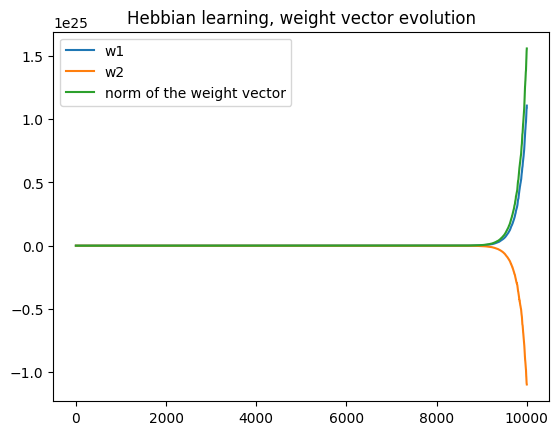

In [53]:
print(ws.shape)
plt.plot(ws[:,0], label='w1')
plt.plot(ws[:,1], label='w2')
plt.plot(np.linalg.norm(ws, axis=1), label='norm of the weight vector')
plt.legend()
plt.title('Hebbian learning, weight vector evolution')
plt.show()

In [91]:
update_func = OjaUpdate(alpha=2)

oja_net = Hebbian(2, update_func=update_func)

ws_oja = oja_net.train(data,  eta =0.01, epochs=10)
oja_net.w

array([[ 0.50462547, -0.49566796]])

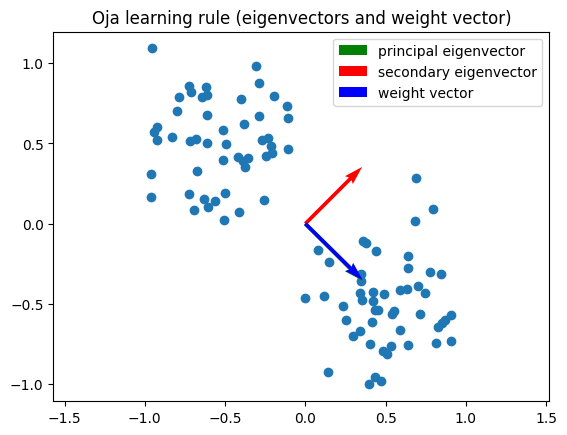

In [92]:

plt.scatter(data[:,0], data[:,1])
# plot the eigenvectors
plt.quiver(0, 0, principal_eigenvector[0], principal_eigenvector[1], scale= 2, scale_units='xy', angles='xy', color='g', label='principal eigenvector')
plt.quiver(0, 0, secondary_eigenvector[0], secondary_eigenvector[1], scale=2, scale_units='xy', angles='xy', color='r', label='secondary eigenvector')

# plot the weight vector
norm_w = oja_net.w / np.linalg.norm(oja_net.w)
plt.quiver(0, 0, norm_w[0,0], norm_w[0,1], scale=2, scale_units='xy', angles='xy', color='b', label='weight vector')
plt.axis('equal')
plt.legend()
plt.title('Oja learning rule (eigenvectors and weight vector)')
plt.show()

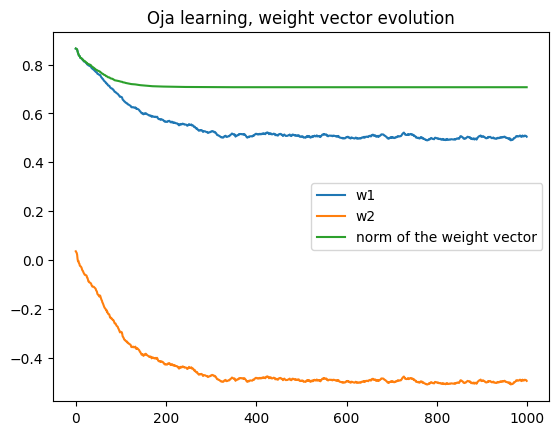

In [93]:
plt.plot(ws_oja[:,0], label='w1')
plt.plot(ws_oja[:,1], label='w2')
plt.plot(np.linalg.norm(ws_oja, axis=1), label='norm of the weight vector')
plt.legend()
plt.title('Oja learning, weight vector evolution')
plt.show()

In [72]:
update_func = SubtractiveNormUpdate()

sn_net = Hebbian(2, update_func=update_func)
ws_sn = sn_net.train(data, 0.01, 100)  



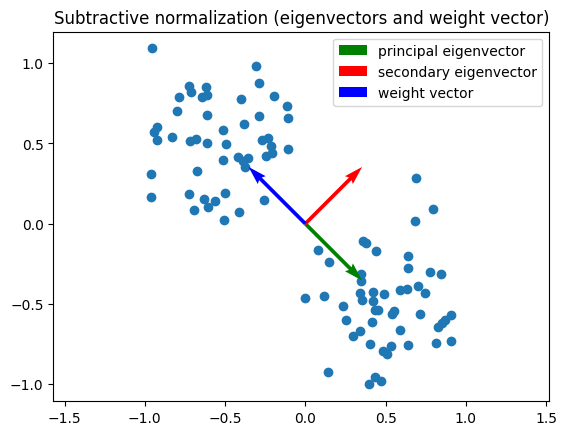

In [73]:
plt.scatter(data[:,0], data[:,1])
# plot the eigenvectors
plt.quiver(0, 0, principal_eigenvector[0], principal_eigenvector[1], scale= 2, scale_units='xy', angles='xy', color='g', label='principal eigenvector')
plt.quiver(0, 0, secondary_eigenvector[0], secondary_eigenvector[1], scale=2, scale_units='xy', angles='xy', color='r', label='secondary eigenvector')

# plot the weight vector
norm_w = sn_net.w / np.linalg.norm(sn_net.w)
plt.quiver(0, 0, norm_w[0,0], norm_w[0,1], scale=2, scale_units='xy', angles='xy', color='b', label='weight vector')
plt.axis('equal')
plt.legend()
plt.title('Subtractive normalization (eigenvectors and weight vector)')
plt.show()


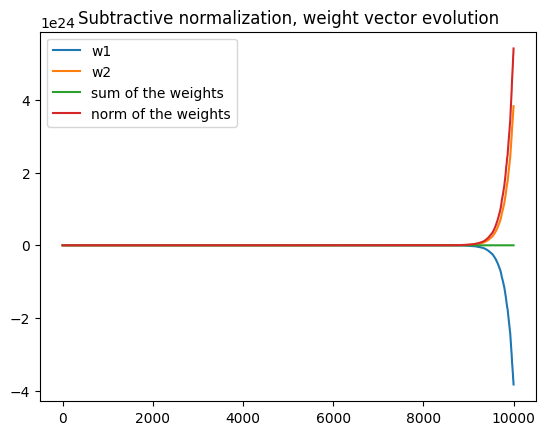

In [74]:
ws.shape

plt.plot(ws_sn[:,0], label='w1')
plt.plot(ws_sn[:,1], label='w2')
plt.plot(np.sum(ws, axis=1), label='sum of the weights')
plt.plot(np.linalg.norm(ws_sn, axis=1), label='norm of the weights')
plt.legend()
plt.title('Subtractive normalization, weight vector evolution')
plt.show()

In [123]:
update_func = BCMUpdate(0.5, 0.01)

bcm_net =Hebbian(2, update_func)

ws = bcm_net.train(data, eta=0.01, epochs =100)
    

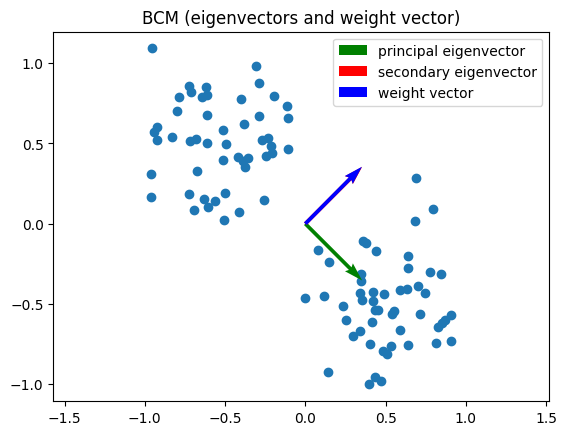

In [124]:
plt.scatter(data[:,0], data[:,1])
# plot the eigenvectors
plt.quiver(0, 0, principal_eigenvector[0], principal_eigenvector[1], scale= 2, scale_units='xy', angles='xy', color='g', label='principal eigenvector')
plt.quiver(0, 0, secondary_eigenvector[0], secondary_eigenvector[1], scale=2, scale_units='xy', angles='xy', color='r', label='secondary eigenvector')

# plot the weight vector
norm_w = bcm_net.w / np.linalg.norm(bcm_net.w)
plt.quiver(0, 0, norm_w[0,0], norm_w[0,1], scale=2, scale_units='xy', angles='xy', color='b', label='weight vector')

plt.axis('equal')
plt.legend()
plt.title('BCM (eigenvectors and weight vector)')
plt.show()


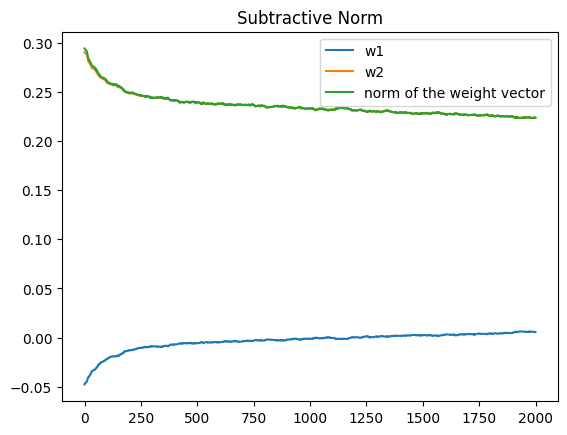

In [115]:
plt.plot(ws[:,0], label='w1')
plt.plot(ws[:,1], label='w2')
plt.plot(np.linalg.norm(ws, axis=1), label='norm of the weight vector')
plt.title('BCM learning, weight vector evolution')
plt.legend()
plt.show()

In [118]:
class CovarianceRule():
    def __init__(self, dim) -> None:
        self.w = (np.random.rand(1, dim) - 0.5) * 2 # weight vector in range [-1, 1]

    def train(self, data, eta, n_epochs, update, theta=None):
        # shuffle the data
        np.random.shuffle(data)
        u_bar = np.mean(data, axis=0)
        
        ws = []
       
        for epoch in range(n_epochs):
            
            for u in data:
                # w<- Cw
                if update =='covariance matrix':
                    C = np.outer(u - u_bar, u - u_bar)
                    self.w += eta*(C @ self.w.T).T
                # w<- w + v*(u-theta_u)
                elif update == 'u':
                    if theta is None:
                        theta = u_bar
                    v = np.dot(self.w, u.T)
                    self.w+= eta* v* (u - theta)
                # w<- w + (v -theta_v)*u
                elif update == 'v':
                    v_bar = np.dot(self.w, u_bar.T)
                    if theta is None:
                        theta = v_bar
                    v = np.dot(self.w, u.T)
                    self.w+= eta* (v - theta)* u

                    
                ws.append(self.w.copy())
        return np.array(ws).squeeze()

In [119]:
cov_net = CovarianceRule(2)
ws = cov_net.train(data, 0.01, 20, 'covariance matrix')

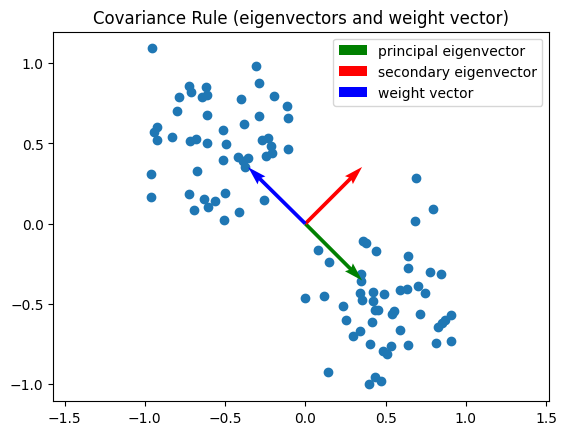

In [121]:
plt.scatter(data[:,0], data[:,1])
# plot the eigenvectors\
plt.quiver(0, 0, principal_eigenvector[0], principal_eigenvector[1], scale= 2, scale_units='xy', angles='xy', color='g', label='principal eigenvector')
plt.quiver(0, 0, secondary_eigenvector[0], secondary_eigenvector[1], scale=2, scale_units='xy', angles='xy', color='r', label='secondary eigenvector')

# plot the weight vector
norm_w = cov_net.w / np.linalg.norm(cov_net.w)
plt.quiver(0, 0, norm_w[0,0], norm_w[0,1], scale=2, scale_units='xy', angles='xy', color='b', label='weight vector')
plt.axis('equal')
plt.legend()
plt.title('Covariance Rule (eigenvectors and weight vector)')
plt.show()

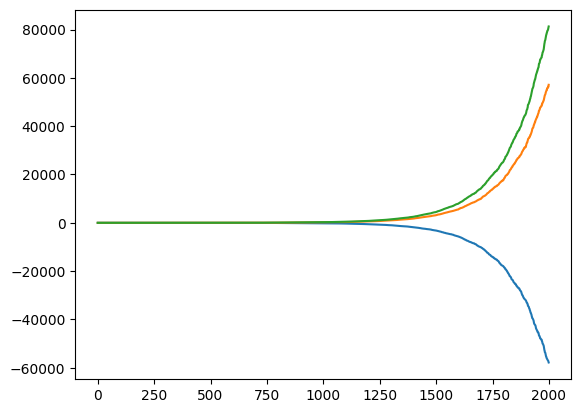

In [122]:
plt.plot(ws[:,0], label='w1')
plt.plot(ws[:,1], label='w2')
plt.plot(np.linalg.norm(ws, axis=1), label='norm of the weight vector')